In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
# Read the csv file into a pandas DataFrame
final_merge = pd.read_csv('Voter_final_clean.csv')
final_merge.head(2)

,Year,State,General:VEP Turnout Rate,General:Total Ballots Counted,VEP,Total registered,Primary:VEP Turnout Rate,Primary:Total Ballots Counted
0,2000,Alabama,59.00%,"1,912,592","3,241,682","2,411,000",15.30%,"489,573"
1,2004,Alabama,57.40%,"1,890,317","3,292,608","2,418,000",26.00%,"863,695"


In [3]:
#add new column
final_merge["Re-election"] = 0

In [4]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Year                           255 non-null    int64 
 1   State                          255 non-null    object
 2   General:VEP Turnout Rate       255 non-null    object
 3   General:Total Ballots Counted  255 non-null    object
 4   VEP                            255 non-null    object
 5   Total registered               255 non-null    object
 6   Primary:VEP Turnout Rate       255 non-null    object
 7   Primary:Total Ballots Counted  255 non-null    object
 8   Re-election                    255 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [5]:
# label election year 0 and relection year 1
final_merge.loc[final_merge["Year"].isin([2004,2012]),"Re-election"] = 1
final_merge

,Year,State,General:VEP Turnout Rate,General:Total Ballots Counted,VEP,Total registered,Primary:VEP Turnout Rate,Primary:Total Ballots Counted,Re-election
0,2000,Alabama,59.00%,"1,912,592","3,241,682","2,411,000",15.30%,"489,573",0
1,2004,Alabama,57.40%,"1,890,317","3,292,608","2,418,000",26.00%,"863,695",1
2,2008,Alabama,61.00%,"2,105,622","3,454,510","2,438,000",32.20%,"1,088,835",0
3,2012,Alabama,59.00%,"2,088,138","3,539,217","2,556,000",24.80%,"871,025",1
4,2016,Alabama,59.10%,"2,134,061","3,609,447","2,526,000",35.00%,"1,260,551",0
...,...,...,...,...,...,...,...,...,...
250,2000,Wyoming,61.40%,"221,685","361,078","240,000",2.00%,"7,096",0
251,2004,Wyoming,66.30%,"245,789","370,785","265,000",2.00%,"7,545",1
252,2008,Wyoming,63.10%,"256,035","405,732","270,000",2.60%,"9,953",0
253,2012,Wyoming,59.00%,"250,701","425,142","268,000",0.30%,"1,308",1


In [6]:
#convert data type, remove % and replace
# https://www.geeksforgeeks.org/python-pandas-series-astype-to-convert-data-type-of-series/
#      data["Salary"]= data["Salary"].astype(int) 
#      data["Number"]= data["Number"].astype(str

final_merge["General:VEP Turnout Rate"] = final_merge["General:VEP Turnout Rate"].str.replace("%","").astype(float) 
final_merge

,Year,State,General:VEP Turnout Rate,General:Total Ballots Counted,VEP,Total registered,Primary:VEP Turnout Rate,Primary:Total Ballots Counted,Re-election
0,2000,Alabama,59.0,"1,912,592","3,241,682","2,411,000",15.30%,"489,573",0
1,2004,Alabama,57.4,"1,890,317","3,292,608","2,418,000",26.00%,"863,695",1
2,2008,Alabama,61.0,"2,105,622","3,454,510","2,438,000",32.20%,"1,088,835",0
3,2012,Alabama,59.0,"2,088,138","3,539,217","2,556,000",24.80%,"871,025",1
4,2016,Alabama,59.1,"2,134,061","3,609,447","2,526,000",35.00%,"1,260,551",0
...,...,...,...,...,...,...,...,...,...
250,2000,Wyoming,61.4,"221,685","361,078","240,000",2.00%,"7,096",0
251,2004,Wyoming,66.3,"245,789","370,785","265,000",2.00%,"7,545",1
252,2008,Wyoming,63.1,"256,035","405,732","270,000",2.60%,"9,953",0
253,2012,Wyoming,59.0,"250,701","425,142","268,000",0.30%,"1,308",1


In [7]:
final_merge["Primary:VEP Turnout Rate"] = final_merge["Primary:VEP Turnout Rate"].str.replace("%","").astype(float) 
final_merge

,Year,State,General:VEP Turnout Rate,General:Total Ballots Counted,VEP,Total registered,Primary:VEP Turnout Rate,Primary:Total Ballots Counted,Re-election
0,2000,Alabama,59.0,"1,912,592","3,241,682","2,411,000",15.3,"489,573",0
1,2004,Alabama,57.4,"1,890,317","3,292,608","2,418,000",26.0,"863,695",1
2,2008,Alabama,61.0,"2,105,622","3,454,510","2,438,000",32.2,"1,088,835",0
3,2012,Alabama,59.0,"2,088,138","3,539,217","2,556,000",24.8,"871,025",1
4,2016,Alabama,59.1,"2,134,061","3,609,447","2,526,000",35.0,"1,260,551",0
...,...,...,...,...,...,...,...,...,...
250,2000,Wyoming,61.4,"221,685","361,078","240,000",2.0,"7,096",0
251,2004,Wyoming,66.3,"245,789","370,785","265,000",2.0,"7,545",1
252,2008,Wyoming,63.1,"256,035","405,732","270,000",2.6,"9,953",0
253,2012,Wyoming,59.0,"250,701","425,142","268,000",0.3,"1,308",1


In [8]:

final_merge["General:Total Ballots Counted"] = final_merge["General:Total Ballots Counted"].str.replace(",","").astype(int) 
final_merge

,Year,State,General:VEP Turnout Rate,General:Total Ballots Counted,VEP,Total registered,Primary:VEP Turnout Rate,Primary:Total Ballots Counted,Re-election
0,2000,Alabama,59.0,1912592,"3,241,682","2,411,000",15.3,"489,573",0
1,2004,Alabama,57.4,1890317,"3,292,608","2,418,000",26.0,"863,695",1
2,2008,Alabama,61.0,2105622,"3,454,510","2,438,000",32.2,"1,088,835",0
3,2012,Alabama,59.0,2088138,"3,539,217","2,556,000",24.8,"871,025",1
4,2016,Alabama,59.1,2134061,"3,609,447","2,526,000",35.0,"1,260,551",0
...,...,...,...,...,...,...,...,...,...
250,2000,Wyoming,61.4,221685,"361,078","240,000",2.0,"7,096",0
251,2004,Wyoming,66.3,245789,"370,785","265,000",2.0,"7,545",1
252,2008,Wyoming,63.1,256035,"405,732","270,000",2.6,"9,953",0
253,2012,Wyoming,59.0,250701,"425,142","268,000",0.3,"1,308",1


In [9]:
final_merge["VEP"] = final_merge["VEP"].str.replace(",","").astype(int) 
final_merge

,Year,State,General:VEP Turnout Rate,General:Total Ballots Counted,VEP,Total registered,Primary:VEP Turnout Rate,Primary:Total Ballots Counted,Re-election
0,2000,Alabama,59.0,1912592,3241682,"2,411,000",15.3,"489,573",0
1,2004,Alabama,57.4,1890317,3292608,"2,418,000",26.0,"863,695",1
2,2008,Alabama,61.0,2105622,3454510,"2,438,000",32.2,"1,088,835",0
3,2012,Alabama,59.0,2088138,3539217,"2,556,000",24.8,"871,025",1
4,2016,Alabama,59.1,2134061,3609447,"2,526,000",35.0,"1,260,551",0
...,...,...,...,...,...,...,...,...,...
250,2000,Wyoming,61.4,221685,361078,"240,000",2.0,"7,096",0
251,2004,Wyoming,66.3,245789,370785,"265,000",2.0,"7,545",1
252,2008,Wyoming,63.1,256035,405732,"270,000",2.6,"9,953",0
253,2012,Wyoming,59.0,250701,425142,"268,000",0.3,"1,308",1


In [10]:
final_merge["Total registered"] = final_merge["Total registered"].str.replace(",","").astype(int) 
final_merge

,Year,State,General:VEP Turnout Rate,General:Total Ballots Counted,VEP,Total registered,Primary:VEP Turnout Rate,Primary:Total Ballots Counted,Re-election
0,2000,Alabama,59.0,1912592,3241682,2411000,15.3,"489,573",0
1,2004,Alabama,57.4,1890317,3292608,2418000,26.0,"863,695",1
2,2008,Alabama,61.0,2105622,3454510,2438000,32.2,"1,088,835",0
3,2012,Alabama,59.0,2088138,3539217,2556000,24.8,"871,025",1
4,2016,Alabama,59.1,2134061,3609447,2526000,35.0,"1,260,551",0
...,...,...,...,...,...,...,...,...,...
250,2000,Wyoming,61.4,221685,361078,240000,2.0,"7,096",0
251,2004,Wyoming,66.3,245789,370785,265000,2.0,"7,545",1
252,2008,Wyoming,63.1,256035,405732,270000,2.6,"9,953",0
253,2012,Wyoming,59.0,250701,425142,268000,0.3,"1,308",1


In [11]:
final_merge["Primary:Total Ballots Counted"] = final_merge["Primary:Total Ballots Counted"].str.replace(",","").astype(int) 
final_merge

,Year,State,General:VEP Turnout Rate,General:Total Ballots Counted,VEP,Total registered,Primary:VEP Turnout Rate,Primary:Total Ballots Counted,Re-election
0,2000,Alabama,59.0,1912592,3241682,2411000,15.3,489573,0
1,2004,Alabama,57.4,1890317,3292608,2418000,26.0,863695,1
2,2008,Alabama,61.0,2105622,3454510,2438000,32.2,1088835,0
3,2012,Alabama,59.0,2088138,3539217,2556000,24.8,871025,1
4,2016,Alabama,59.1,2134061,3609447,2526000,35.0,1260551,0
...,...,...,...,...,...,...,...,...,...
250,2000,Wyoming,61.4,221685,361078,240000,2.0,7096,0
251,2004,Wyoming,66.3,245789,370785,265000,2.0,7545,1
252,2008,Wyoming,63.1,256035,405732,270000,2.6,9953,0
253,2012,Wyoming,59.0,250701,425142,268000,0.3,1308,1


In [12]:
con_final_merge = final_merge
con_final_merge

,Year,State,General:VEP Turnout Rate,General:Total Ballots Counted,VEP,Total registered,Primary:VEP Turnout Rate,Primary:Total Ballots Counted,Re-election
0,2000,Alabama,59.0,1912592,3241682,2411000,15.3,489573,0
1,2004,Alabama,57.4,1890317,3292608,2418000,26.0,863695,1
2,2008,Alabama,61.0,2105622,3454510,2438000,32.2,1088835,0
3,2012,Alabama,59.0,2088138,3539217,2556000,24.8,871025,1
4,2016,Alabama,59.1,2134061,3609447,2526000,35.0,1260551,0
...,...,...,...,...,...,...,...,...,...
250,2000,Wyoming,61.4,221685,361078,240000,2.0,7096,0
251,2004,Wyoming,66.3,245789,370785,265000,2.0,7545,1
252,2008,Wyoming,63.1,256035,405732,270000,2.6,9953,0
253,2012,Wyoming,59.0,250701,425142,268000,0.3,1308,1


In [13]:
# #https://github.com/pandas-profiling/pandas-profiling, pip installed 
# profile = ProfileReport(con_final_merge, title='Pandas Profiling Report', explorative=True)

In [ ]:
# profile.to_file("your_report.html")

In [14]:
ml_data = con_final_merge.drop(columns= ["General:VEP Turnout Rate", "Primary:VEP Turnout Rate"])
ml_data.head(2)

,Year,State,General:Total Ballots Counted,VEP,Total registered,Primary:Total Ballots Counted,Re-election
0,2000,Alabama,1912592,3241682,2411000,489573,0
1,2004,Alabama,1890317,3292608,2418000,863695,1


In [15]:
ml_data.to_csv("ml_data-tve.csv", index=False)

In [16]:
from sklearn.preprocessing import LabelEncoder 

#initializing an object of class LabelEncoder
labelencoder= LabelEncoder() 

#fitting and transforming the desired categorical column.
ml_data['State'] = labelencoder.fit_transform(ml_data['State']) 
ml_data.head(2)

,Year,State,General:Total Ballots Counted,VEP,Total registered,Primary:Total Ballots Counted,Re-election
0,2000,0,1912592,3241682,2411000,489573,0
1,2004,0,1890317,3292608,2418000,863695,1


In [17]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
r = ml_data['Re-election']
X = ml_data.drop(columns=['General:Total Ballots Counted'])
y = (ml_data["General:Total Ballots Counted"]/1000000).values.reshape(-1, 1)
print(X.shape, y.shape, r.shape)
### END SOLUTION

(255, 6) (255, 1) (255,)


In [18]:
X.head(2)

,Year,State,VEP,Total registered,Primary:Total Ballots Counted,Re-election
0,2000,0,3241682,2411000,489573,0
1,2004,0,3292608,2418000,863695,1


In [19]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train[["VEP","Total registered","Primary:Total Ballots Counted"]])

### END SOLUTION
X_scaler 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train[["VEP","Total registered","Primary:Total Ballots Counted"]])
X_test_scaled = X_scaler.transform(X_test[["VEP","Total registered","Primary:Total Ballots Counted"]])

### END SOLUTION
X_train_scaled

array([[-5.16074871e-01, -5.32449062e-01, -4.98119942e-01],
       [-5.23315427e-01, -5.42022419e-01, -5.93002082e-01],
       [ 1.57315001e-01,  3.04687818e-01, -3.05908989e-01],
       [ 1.07494758e+00,  1.12622367e+00,  6.44868360e-01],
       [ 1.44318420e-01,  1.31303686e-01,  2.58707319e-02],
       [ 7.81275377e-01,  8.98590517e-01,  1.24426859e+00],
       [-6.48832418e-01, -6.81367948e-01, -5.30566238e-01],
       [ 1.15523177e+00,  1.33506468e+00,  2.00141396e+00],
       [-6.33281163e-01, -6.85977342e-01, -6.36475453e-01],
       [ 1.90378327e-01,  2.69585509e-01,  7.25272815e-01],
       [-1.54131430e-01, -7.50553412e-02, -5.77408820e-01],
       [-7.39275386e-02,  2.49330535e-02, -4.43237566e-02],
       [ 7.55488931e-01,  9.64540309e-01,  2.07181751e-01],
       [-6.50248124e-01, -7.02996643e-01, -3.61850612e-01],
       [-2.44026596e-01, -1.88162781e-01, -5.14510930e-01],
       [-4.22961691e-02, -2.36874219e-03, -6.06785925e-01],
       [-8.77867757e-01, -8.83117581e-01

In [23]:
X_train[["VEP","Total registered","Primary:Total Ballots Counted"]] = X_train_scaled
X_test[["VEP","Total registered","Primary:Total Ballots Counted"]] = X_test_scaled

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [24]:
X_test

,Year,State,VEP,Total registered,Primary:Total Ballots Counted,Re-election
190,2000,38,1.179477,1.045027,1.190641,0
6,2004,1,-0.884044,-0.909710,-0.702975,1
79,2016,15,-0.445182,-0.440616,-0.438909,0
205,2000,41,-0.861013,-0.894818,-0.627641,0
117,2008,23,-0.098280,0.011105,-0.501564,0
...,...,...,...,...,...,...
60,2000,12,-0.782411,-0.826387,-0.620767,0
101,2004,20,-0.084629,-0.079310,-0.221108,1
172,2008,34,-0.871465,-0.886663,-0.694039,0
248,2012,49,0.013855,0.148323,0.127111,1


In [25]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.057446847321347506, R2: 0.9914012628851123


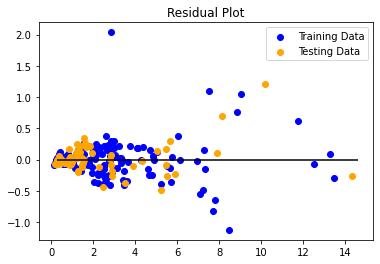

In [27]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, 
#                           versus the model predicted values
# Hint: You can predict values of X training and testing data
#            using the model.predict() method on a fitted model

%matplotlib inline
### BEGIN SOLUTION
predictions = model.predict(X_test)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [28]:
X_test_predict = X_test

In [29]:
X_test_predict["Predictions"] = model.predict(X_test)

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
X_test_predict["Actuals"] = y_test

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
X_test_predict["Residual Testing"] = X_test_predict["Predictions"] - X_test_predict["Actuals"] 

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
X_test_training = X_train
X_test_training

,Year,State,VEP,Total registered,Primary:Total Ballots Counted,Re-election
224,2016,44,-0.516075,-0.532449,-0.498120,0
144,2016,28,-0.523315,-0.542022,-0.593002,0
108,2012,21,0.157315,0.304688,-0.305909,1
178,2012,35,1.074948,1.126224,0.644868,1
73,2012,14,0.144318,0.131304,0.025871,1
...,...,...,...,...,...,...
106,2004,21,0.091401,0.206827,-0.176372,1
14,2016,2,0.140738,0.086983,0.132545,0
92,2008,18,-0.225977,-0.179653,-0.293526,0
179,2016,35,1.095813,1.144661,1.824967,0


In [33]:
X_test_training["Residual Training"] = model.predict(X_train) - y_train
X_test_training.head(2)

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,State,VEP,Total registered,Primary:Total Ballots Counted,Re-election,Residual Training
224,2016,44,-0.516075,-0.532449,-0.498120,0,0.044754
144,2016,28,-0.523315,-0.542022,-0.593002,0,0.055649


In [34]:
X_test_training_sort = X_test_training.sort_values(by=["Residual Training"], ascending=False)
X_test_training_sort.head(5)

,Year,State,VEP,Total registered,Primary:Total Ballots Counted,Re-election,Residual Training
128,2012,25,0.067288,0.171725,-0.463364,1,2.036685
215,2000,43,2.122528,2.137808,0.767110,0,1.103183
218,2012,43,2.860228,2.783124,0.864787,1,1.051405
217,2008,43,2.575805,2.561164,2.568515,0,0.763893
20,2000,4,3.712252,3.602887,5.395115,0,0.609285


In [35]:
 X_test_predict_sort = X_test_predict.sort_values(by=["Residual Testing"], ascending=False)
 X_test_predict_sort.head(5)

,Year,State,VEP,Total registered,Primary:Total Ballots Counted,Re-election,Predictions,Actuals,Residual Testing
219,2016,43,3.177814,3.128828,2.595707,0,10.180696,8.975000,1.205696
216,2004,43,2.304910,2.404444,0.467245,1,8.109554,7.410765,0.698789
124,2016,24,-0.468433,-0.416505,-0.217629,0,1.561994,1.209357,0.352637
66,2004,13,1.057550,1.254223,1.085378,1,5.643674,5.350493,0.293181
25,2000,5,-0.268869,-0.335309,-0.634689,0,1.599411,1.340469,0.258942


In [36]:
X_test_predict_sort_label = X_test_predict_sort

In [37]:
X_test_predict_sort_label["State"] = labelencoder.inverse_transform( X_test_predict_sort['State'])
X_test_predict_sort_label

,Year,State,VEP,Total registered,Primary:Total Ballots Counted,Re-election,Predictions,Actuals,Residual Testing
219,2016,Texas,3.177814,3.128828,2.595707,0,10.180696,8.975000,1.205696
216,2004,Texas,2.304910,2.404444,0.467245,1,8.109554,7.410765,0.698789
124,2016,Mississippi,-0.468433,-0.416505,-0.217629,0,1.561994,1.209357,0.352637
66,2004,Illinois,1.057550,1.254223,1.085378,1,5.643674,5.350493,0.293181
25,2000,Colorado,-0.268869,-0.335309,-0.634689,0,1.599411,1.340469,0.258942
...,...,...,...,...,...,...,...,...,...
238,2012,Washington,0.160275,0.224555,-0.677079,1,2.905091,3.172939,-0.267848
24,2016,California,5.007414,4.679003,5.910588,0,14.340026,14.610509,-0.270483
152,2008,NewJersey,0.388371,0.397939,0.607219,0,3.531071,3.910220,-0.379149
117,2008,Minnesota,-0.098280,0.011105,-0.501564,0,2.474382,2.921147,-0.446765


In [38]:
X_test_training_sort_label = X_test_training_sort

In [39]:
X_test_training_sort_label["State"] = labelencoder.inverse_transform( X_test_training_sort['State'])
X_test_training_sort_label

,Year,State,VEP,Total registered,Primary:Total Ballots Counted,Re-election,Residual Training
128,2012,Missouri,0.067288,0.171725,-0.463364,1,2.036685
215,2000,Texas,2.122528,2.137808,0.767110,0,1.103183
218,2012,Texas,2.860228,2.783124,0.864787,1,1.051405
217,2008,Texas,2.575805,2.561164,2.568515,0,0.763893
20,2000,California,3.712252,3.602887,5.395115,0,0.609285
...,...,...,...,...,...,...,...
162,2008,NewYork,2.102427,1.970806,1.269138,0,-0.488321
46,2004,Florida,1.830698,1.886065,1.181740,1,-0.554305
47,2008,Florida,2.039920,2.082850,2.592776,0,-0.643457
48,2012,Florida,2.232930,2.199149,0.583012,1,-0.826887
